In [87]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [21]:
# reflect an existing database into a new model
# Reflect Database into ORM class
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [22]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [23]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [33]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [27]:
inspector = inspect(engine)

In [28]:
inspector.get_table_names()

['measurement', 'station']

In [31]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [55]:
# Find the most recent date in the data set.
recentDate = session.query(measurement.date).\
    order_by(measurement.date.desc()).first()
recentDate

('2017-08-23',)

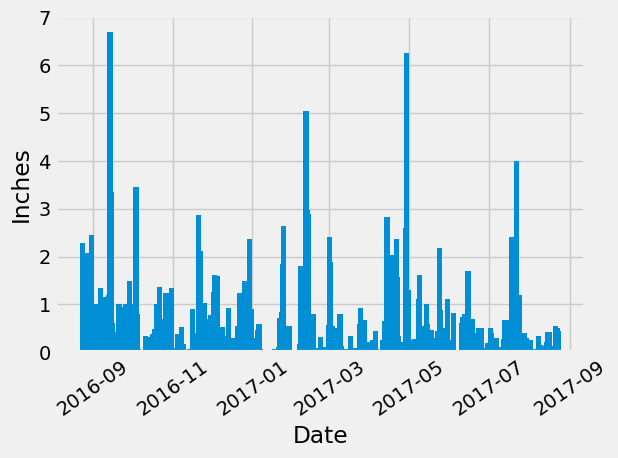

In [341]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date = dt.datetime(2016, 8, 23)

# Perform a query to retrieve the data and precipitation scores
YOYPerc = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > date).all()
YOYPerc

# Save the query results as a Pandas DataFrame. Explicitly set the column names
YOYPercDF = pd.DataFrame(YOYPerc, columns = ['Date', 'Precipitation'])
YOYPercDF['Date'] = pd.to_datetime(YOYPercDF['Date'])

# Sort the dataframe by date
YOYPercDF.set_index('Date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data

plt.bar(YOYPercDF.index, YOYPercDF.Precipitation, width=4)
plt.ylabel("Inches")
plt.xlabel("Date")
plt.xticks(rotation = 35)
plt.tight_layout()
plt.show()

In [344]:
YOYPercTest = session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
    filter(func.strftime("%Y"), measurement.date > "2016").all()
stDateData = []
for tmin, tavg, tmax in YOYPercTest:
    stDateDict = {}
    stDateDict["Min Temp"] = tmin 
    stDateDict["Avg Temp"] = tavg
    stDateDict["Max Temp"] = tmax
    stDateData.append(stDateDict)
stDateData

[(56.0, 74.14409066378845, 87.0)]

In [350]:
x = 2011

In [351]:
if x in range(2010, 2017):
    print("Nice")
else: 
    print("Not nice")

SyntaxError: invalid syntax (2897930288.py, line 1)

In [96]:
# Use Pandas to calculate the summary statistics for the precipitation data
YOYPercDF.describe()


,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [97]:
columns = inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [119]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.station).all()

[(1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,)]

In [123]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
stationStat = session.query(station.station, func.count(measurement.station)).\
        filter(measurement.station == station.station).\
        group_by(station.station).order_by(func.count(measurement.station).desc()).all()
# List the stations and their counts in descending order.
stationStat

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [249]:
activeStats = []
activeStats = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
        filter(measurement.station == 'USC00519281').all()
activeStats

[(54.0, 85.0, 71.66378066378067)]

In [262]:
YOYTemp = session.query(measurement.tobs).\
    filter(measurement.date > date).\
    filter(measurement.station == 'USC00519281').all()
YOYTempDF = pd.DataFrame(YOYTemp, columns=['Temperature'])
YOYTempDF

,Temperature
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
...,...
346,77.0
347,77.0
348,76.0
349,76.0


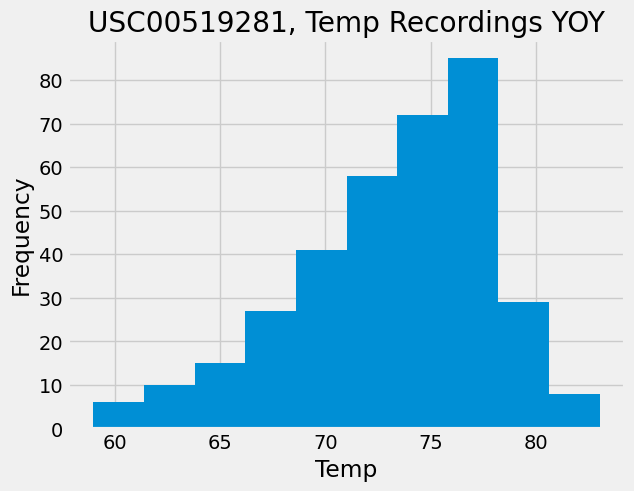

In [267]:
plt.hist(YOYTempDF)
plt.title("USC00519281, Temp Recordings YOY")
plt.xlabel("Temp")
plt.ylabel("Frequency")
plt.show()

# Close Session

In [16]:
# Close Session
session.close()